In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import os
import graphviz

In [176]:
image_directory = r'C:\Users\Bishal\PycharmProjects\machineLearning1\src\images'
os.makedirs(image_directory, exist_ok=True)

In [177]:
# Load the Subway dataset
subway_file_path = r'C:\Users\Bishal\PycharmProjects\machineLearning1\src\datasets\Sub_Sandwiches_OSAT.csv'
subway_data = pd.read_csv(subway_file_path)

In [178]:
# Convert the 'OSAT' column to numerical values
le = LabelEncoder()
subway_data['OSAT'] = le.fit_transform(subway_data['OSAT'])

In [179]:
# Restrict the dataset to only 3 unique classes
subway_data = subway_data[subway_data['OSAT'].isin([0, 1, 2])]

In [180]:
# Identify features and target variable
feature_columns = subway_data.columns[2:]
target_column = 'OSAT'

In [181]:
# Extract features and target
features = subway_data[feature_columns].values
target = subway_data[target_column].values

In [182]:
features.shape

(469, 41)

In [183]:
target.shape

(469,)

In [184]:
features[0]

array([1., 5., 1., 4., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 4., 1., 5.,
       2., 1., 4., 2., 2., 1., 1., 5., 1., 4., 3., 4., 4., 1., 5., 1., 3.,
       2., 1., 1., 2., 2., 1., 1.])

In [185]:
# Split the data into training and testing sets
training_features, test_features, training_target, test_target = train_test_split(
    features, target, test_size=0.2, random_state=42)

In [186]:
print(training_features.shape, test_features.shape)

(375, 41) (94, 41)


In [187]:
# Create a Decision Tree model
dtc = DecisionTreeClassifier(criterion='entropy')

In [188]:
# Train the model
model = dtc.fit(training_features, training_target)

In [189]:
# Make prediction
predictions = model.predict(test_features)

In [190]:
# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data=test_features, columns=feature_columns)
df_visualization['target'] = test_target

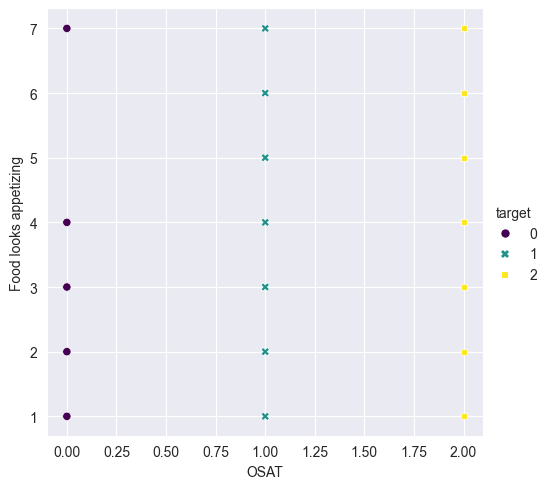

In [191]:
# Scatter plot using Seaborn
sns.relplot(
    x=feature_columns[0], y=feature_columns[1], hue='target', style='target', palette='viridis', data=df_visualization)
plt.show()

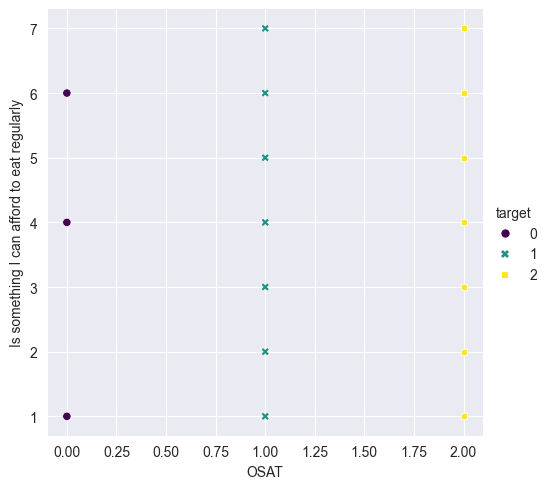

In [192]:
# Scatter plot using Seaborn
sns.relplot(
    x=feature_columns[0], y=feature_columns[13], hue='target', style='target', palette='viridis', data=df_visualization)
plt.show()

In [193]:
#Evaluate the model
matrix = confusion_matrix(test_target, predictions)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[11  0  0]
 [ 0 29  0]
 [ 0  0 54]]


In [194]:
#create classification report
classification_rep = classification_report(test_target, predictions)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        54

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94


In [195]:
dot_data = export_graphviz(
    model, out_file=None, feature_names=feature_columns,
    filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
image_path = os.path.join(image_directory, 'decision_tree')
graph.render(image_path, format='png')

'C:\\Users\\Bishal\\PycharmProjects\\machineLearning1\\src\\images\\decision_tree.png'

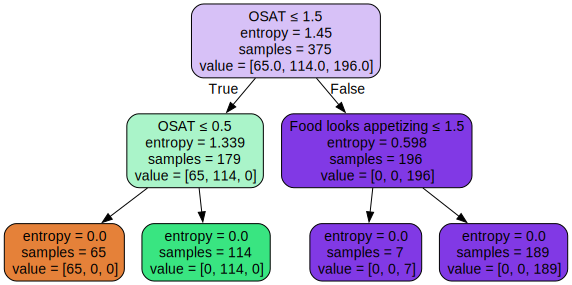

In [196]:
graph